In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt
import GPy
from numba import jit

from bo import bayesianOptimization
from acquisitions import ei, rollout_utility_archive
from utils import minimize, gap

In [6]:
norm = True
objective_true  = GPyOpt.objective_examples.experiments2d.branin(bounds=[(0, 1), (0, 1)],normalized = norm)               # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.branin(bounds=[(0, 1), (0, 1)],sd = 0.0001,normalized = norm)         # noisy version
bounds = objective_true.bounds     

In [7]:
objective_true  = GPyOpt.objective_examples.experiments2d.powers()               # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.powers()         # noisy version
bounds = objective_true.bounds     

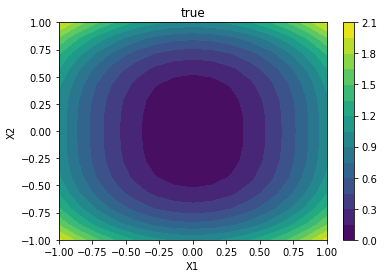

In [8]:
grid = 15
x1 = np.linspace(bounds[0][0], bounds[0][1], grid)
x2 = np.linspace(bounds[1][0], bounds[1][1], grid)
X1, X2 = np.meshgrid(x1, x2)
_X = np.hstack((X1.reshape(grid*grid,1),X2.reshape(grid*grid,1)))
_Y = objective_true.f(_X)

plt.figure()    
plt.contourf(X1, X2, _Y.reshape((grid,grid)),grid)
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("true")
plt.show()

In [9]:
fmin = objective_true.f(minimize(objective_true.f,bounds,grid=500))[0][0]

In [10]:
fmin

4.024096320962257e-06

In [45]:
obj_f = objective_true.f
kernel = GPy.kern.RBF(2, ARD=True)
seed = 2
np.random.seed(seed=seed)

h=1
N_q=5
N = 5
init_n=0

n = 1
queriesei = {}
valuesei={}
gapsei=[]
queriesro = {}
valuesro={}
gapsro=[]

for i in range(n):
    print("n_ei",i)
    _query, _value = bayesianOptimization(obj_f,
                                          ei,
                                          bounds,
                                          depth_h = h,
                                          N = N,
                                          initial_n=init_n,
                                          N_q = N_q,
                                          ARD_Flag = False,
                                          length_scale = 0.1
                                          )
    queriesei[i] = _query
    valuesei[i] = _value
    gapsei.append(gap(_value, fmin=fmin))

for i in range(n):
    print("n_rollout", i)
    _query, _value = bayesianOptimization(obj_f,
                                          rollout_utility_archive,
                                          bounds,
                                          depth_h = h,
                                          N = N,
                                          initial_n=init_n,
                                          N_q = N_q,
                                          decay_rate=1.,
                                          ARD_Flag = False,
                                          length_scale = 0.1
                                          )
    queriesro[i] = _query
    valuesro[i] = _value
    gapsro.append(gap(_value, fmin=fmin))


n_ei 0
0
1
2
3
4
n_rollout 0
0
1
2
3
4


In [46]:
gapsei

[0.9880959679414244]

In [47]:
np.mean(gapsei)

0.9880959679414244

In [48]:
gapsro

[0.1307541528253669]

In [39]:
queriesro

{0: array([[ 0.8       ,  0.8       ],
        [-1.        ,  1.        ],
        [-1.        , -0.77777778],
        [ 0.55555556, -1.        ],
        [ 1.        , -0.11111111],
        [ 1.        , -1.        ]]), 1: array([[ 0.8       ,  0.8       ],
        [-1.        ,  1.        ],
        [-1.        , -0.77777778],
        [ 0.55555556, -1.        ],
        [ 1.        , -0.11111111],
        [ 1.        , -1.        ]]), 2: array([[ 0.8       ,  0.8       ],
        [-1.        ,  1.        ],
        [-1.        , -0.77777778],
        [ 0.55555556, -1.        ],
        [ 1.        , -0.11111111],
        [ 1.        , -1.        ]])}

In [40]:
import pickle
with open('rollout_pow_h1Nq5r5.pickle', mode='wb') as f:
     pickle.dump(queriesro, f)

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
gapsro

[0.1307541528253669, 0.1307541528253669, 0.1307541528253669]

KeyError: 1

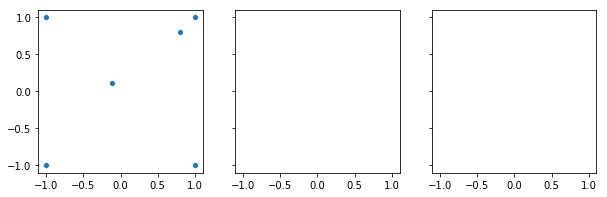

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True,figsize=(10,3))

sns.scatterplot(queriesei[0][:,0],queriesei[0][:,1], ax =ax1)
sns.scatterplot(queriesei[1][:,0],queriesei[1][:,1], ax =ax2)
sns.scatterplot(queriesei[2][:,0],queriesei[2][:,1], ax =ax3)

KeyError: 1

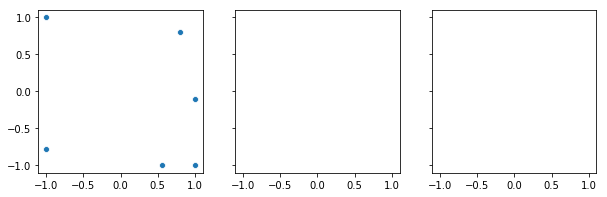

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True,figsize=(10,3))

sns.scatterplot(queriesro[0][:,0],queriesro[0][:,1], ax =ax1)
sns.scatterplot(queriesro[1][:,0],queriesro[1][:,1], ax =ax2)
sns.scatterplot(queriesro[2][:,0],queriesro[2][:,1], ax =ax3)

In [51]:
print("meanEI", np.mean(gapsei))
print("meanRO", np.mean(gapsro))

meanEI 0.9880959679414244
meanRO 0.1307541528253669
